In [1]:
import numpy as np
import tensorflow as tf
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from tensorflow import keras 
import glob as gb
import pandas as pd
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D ,LeakyReLU
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
#Configuramos nuestro conjunto de datos
IMG_SIZE = (274, 274) # resolution
directory = 'C:/Users/jofra/Desktop/Leaves'
BATCH_SIZE = 128  #Tamaño del lote
#Dividimos nuestro conjunto de datos en entrenamiento y validación
train_ds = image_dataset_from_directory(directory,
                                             shuffle=True,
                                             labels='inferred',
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.2,
                                             subset='training',
                                             color_mode='rgb',
                                             seed=42)
val_ds = image_dataset_from_directory(directory,
                                             shuffle=True,
                                             labels='inferred',
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.2,
                                             subset='validation',
                                             color_mode='rgb',
                                             seed=42)

Found 3300 files belonging to 3 classes.
Using 2640 files for training.
Found 3300 files belonging to 3 classes.
Using 660 files for validation.


In [3]:
#Podemos ver que los datos estan divididos en tres conjuntos, uno para cada clasificacion
class_names = train_ds.class_names
class_names

['Healthy', 'aculus_olearius', 'train4']

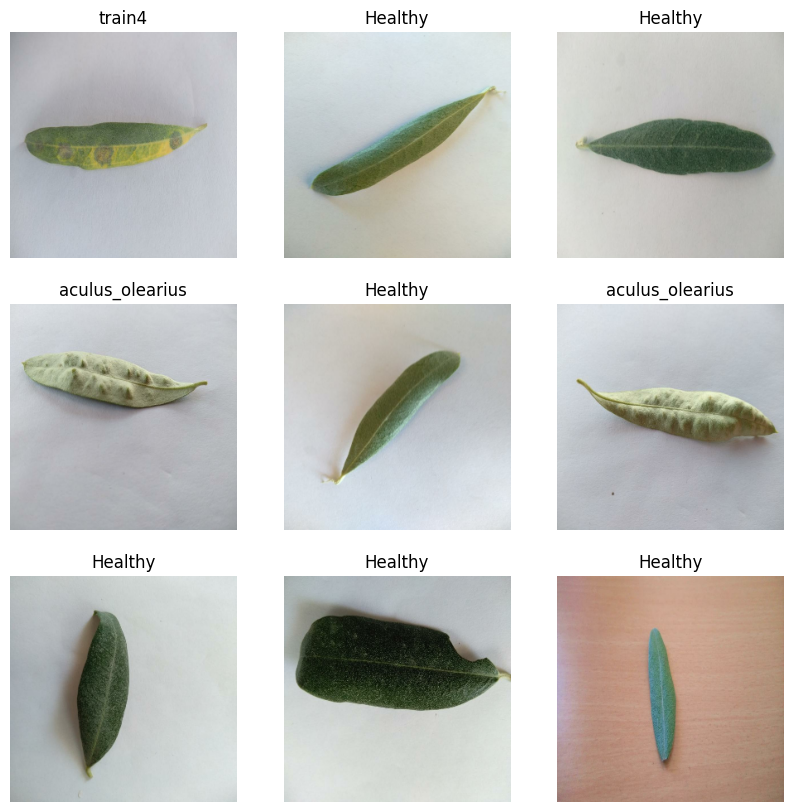

In [4]:
#Podemos ver algunas de las imagenes de entrenamiento
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [5]:
#Vemos la estructura de los datos
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(128, 274, 274, 3)
(128,)


In [6]:
#Este bloque sirve para optimizar el almacenamiento en CPU
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [7]:
#Creamos la arquitecura de la red neuronal
modeloCNN = tf.keras.models.Sequential([
  layers.Rescaling(1./255, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
  tf.keras.layers.Conv2D(16, (5,5), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (5,5), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (5,5), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (5,5), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(256, (5,5), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(500, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(3, activation='sigmoid')
])

In [8]:
#Escogemos la métrica que vamos a monitorear
metric_to_monitor = 'val_accuracy'

# Crear el objeto ModelCheckpoint para guardar el modelo
checkpoint = ModelCheckpoint('best_no_augmentation.h5', monitor=metric_to_monitor, save_best_only=True, mode='max')

# Compilar el modelo y especificar las métricas a monitorear
modeloCNN.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [9]:
from tensorflow.keras.callbacks import TensorBoard

In [10]:
tensorboardCNN = TensorBoard(log_dir='logs/cnn')
modeloCNN.fit(train_ds,
                validation_data=val_ds,
                epochs=100,
                callbacks=[tensorboardCNN,checkpoint])

Epoch 1/100


C:\Users\jofra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


21/21 [==============================] - 73s 3s/step - loss: 1.1748 - accuracy: 0.4242 - val_loss: 0.9337 - val_accuracy: 0.4379
Epoch 2/100
21/21 [==============================] - 71s 3s/step - loss: 0.8980 - accuracy: 0.5417 - val_loss: 0.7971 - val_accuracy: 0.5985
Epoch 3/100
21/21 [==============================] - 71s 3s/step - loss: 0.8136 - accuracy: 0.5913 - val_loss: 0.7220 - val_accuracy: 0.6242
Epoch 4/100
21/21 [==============================] - 72s 3s/step - loss: 0.7236 - accuracy: 0.6402 - val_loss: 0.6650 - val_accuracy: 0.6788
Epoch 5/100
21/21 [==============================] - 71s 3s/step - loss: 0.6938 - accuracy: 0.6644 - val_loss: 0.6416 - val_accuracy: 0.6879
Epoch 6/100
21/21 [==============================] - 72s 3s/step - loss: 0.6364 - accuracy: 0.7129 - val_loss: 0.6372 - val_accuracy: 0.6803
Epoch 7/100
21/21 [==============================] - 71s 3s/step - loss: 0.6208 - accuracy: 0.7159 - val_loss: 0.5428 - val_accuracy: 0.7530
Epoch 8/100


KeyboardInterrupt: 

In [11]:
#Ejecutar tensorboard e indicarle que lea la carpeta "logs"
%tensorboard --logdir logs

UsageError: Line magic function `%tensorboard` not found.


In [12]:
#Hacemos predicciones sobre el conjunto de validación
predCNN=modeloCNN.predict(val_ds)

6/6 [==============================] - 3s 556ms/step


In [13]:
#Nos quedamos con la clase que tenga mayor probabilidad
CNNpred = tf.argmax(predCNN, axis=1)

In [14]:
true_categories = tf.concat([y for x, y in val_ds], axis=0)

In [15]:
#Matriz de confusión
tf.math.confusion_matrix(
    true_categories,
    CNNpred,
    num_classes=None,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None
)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[113,  57,   5],
       [ 32, 153,  11],
       [ 11,  34, 244]])>

### Cargamos el modelo ya entrenado y comprobamos su precisión

In [16]:
#Cargamos el modelo ya entrenado
model_loaded = tf.keras.models.load_model('CNN_no_aumentation_model')

In [17]:
#Hacemos predicciones sobre el conjunto de validación
prednew=model_loaded.predict(val_ds)

6/6 [==============================] - 3s 556ms/step


In [18]:
#Nos quedamos con la clase que tenga mayor probabilidad
npred = tf.argmax(prednew, axis=1)

In [19]:
true_categories = tf.concat([y for x, y in val_ds], axis=0)

In [20]:
#Creamos la matriz de confusión
tf.math.confusion_matrix(
    true_categories,
    npred,
    num_classes=None,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None
)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[158,   9,   8],
       [ 14, 179,   3],
       [ 17,   8, 264]])>

In [21]:
#Vemos la arquitecura del modelo
model_loaded.summary()

Model: "sequential_101"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_83 (Rescaling)    (None, 274, 274, 3)       0         
                                                                 
 conv2d_272 (Conv2D)         (None, 270, 270, 16)      1216      
                                                                 
 max_pooling2d_255 (MaxPooli  (None, 135, 135, 16)     0         
 ng2D)                                                           
                                                                 
 conv2d_273 (Conv2D)         (None, 131, 131, 32)      12832     
                                                                 
 max_pooling2d_256 (MaxPooli  (None, 65, 65, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_274 (Conv2D)         (None, 61, 61, 64)     

In [22]:
#Vemos la precision del modelo para el conjunto de validación
model_loaded.evaluate(val_ds)

C:\Users\jofra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


6/6 [==============================] - 4s 630ms/step - loss: 0.8112 - accuracy: 0.9106


[0.8112192153930664, 0.9106060862541199]